# Лабораторная работа 1
#### Выполнила Алексюнина Юлия, группа М8О-407

### Условие

Cформировать два набора данных для приложений машинного обучения.
Первый датасет должен представлять из себя табличный набор данных для задачи классификации.
Второй датасет должен быть отличен от первого, и может представлять из себя набор изображений, корпус документов, другой табличный датасет или датасет из соревнования Kaggle, предназначенный для решения интересующей вас задачи машинного обучения.
Провести анализ обоих наборов данных;
Поставить решаемую вами задачу;
Определить признаки необходимые для решения задачи, в случае необходимости заняться генерацией новых признаков, устранением проблем в данных;
Визуализировать распределение и зависимость целевого признака от выбранных признаков.
В отчете описать все проблемы, с которыми вы столкнулись, и выбранные подходы к их решению.

Полезные ссылки:
https://pythonworld.ru/obrabotka-dannyx/pandas-cookbook-2.html
https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
https://seaborn.pydata.org/index.html
https://www.kaggle.com/rtatman/chocolate-bar-ratings
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
https://ru.coursera.org/lecture/stats-for-data-analysis/primier-poisk-vzaimosviaziei-s-pomoshch-iu-korrieliatsii-qW5Tb


### Первый датасет

Для выполнения данной лабораторной я выбрала датасет характеристик шоколада, так как он наиболее подходит для задачи классификации. База данных содержит следующие атрибуты: компания-производитель; название шоколада; значение, связанное с тем, когда данные были получены(чем оно выше, тем более свежие данные); дата публикации; процент какао(насколько шоколад горький); геолокация компании-производителя; рейтинг качества; тип какао-бобов; геолокация происхождения какао-бобов.

Импортируем необходимые для работы библиотеки.

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import os

Считаем данные и выведем первые 5 строк.

In [128]:
cb = pd.read_csv('C:/Users/hui/Desktop/ML/input/chocolate_bars.csv')
cb.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
Переименуем колонки в более читабельный вид.

In [131]:
cb.columns = ['Company', 'Bar_name', 
                'Review_update', 'Review_date', 'Cocoa_percentage', 
                'Company_location', 'Quality', 'Bean_type', 
                'Beans_location']
cb.head()

,Company,Bar_name,Review_update,Review_date,Cocoa_percentage,Company_location,Quality,Bean_type,Beans_location
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Проверим, есть ли в датасете какие-либо пропуски.

In [132]:
cb.isnull().sum()

Company             0
Bar_name            0
Review_update       0
Review_date         0
Cocoa_percentage    0
Company_location    0
Quality             0
Bean_type           1
Beans_location      1
dtype: int64

Мы выяснили, что в колонках "Bean_type" и "Beans_location" есть пропущенные данные. 
Удалим эти строки.

In [133]:
cb.dropna(inplace = True)
cb.isnull().sum()

Company             0
Bar_name            0
Review_update       0
Review_date         0
Cocoa_percentage    0
Company_location    0
Quality             0
Bean_type           0
Beans_location      0
dtype: int64

Пропущенных данных нет, но есть много пустых строчек в колонке "Bean_type", которые следует заменить на NaN.

In [134]:
cb['Bean_type'] = cb['Bean_type'].apply(lambda l: np.nan if len(str(l)) < 3 else l)
cb.head()

,Company,Bar_name,Review_update,Review_date,Cocoa_percentage,Company_location,Quality,Bean_type,Beans_location
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,NaN,Peru


In [135]:
cb['Cocoa_percentage'] = cb['Cocoa_percentage'].apply(lambda l: np.float32(str(l).split("%")[0]))
cb.head()

,Company,Bar_name,Review_update,Review_date,Cocoa_percentage,Company_location,Quality,Bean_type,Beans_location
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru


Преобразуем оценки в более удобный формат для классификации по качеству какао-бобов.

In [137]:
def classific(l):
    if l < 2: 
        return 1
    elif 2 < l < 3:
        return 2
    elif 3 < l < 4:
        return 3
    elif 4 < l < 4.5:
        return 4
    else:
        return 5

cb["Quality(round)"] = cb.Quality.apply(lambda l: classific(l))
cb.head()

,Company,Bar_name,Review_update,Review_date,Cocoa_percentage,Company_location,Quality,Bean_type,Beans_location,Quality(round)
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome,3
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo,2
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo,5
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo,3
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru,3


Построим сравнительную диаграмму качества шоколадок.

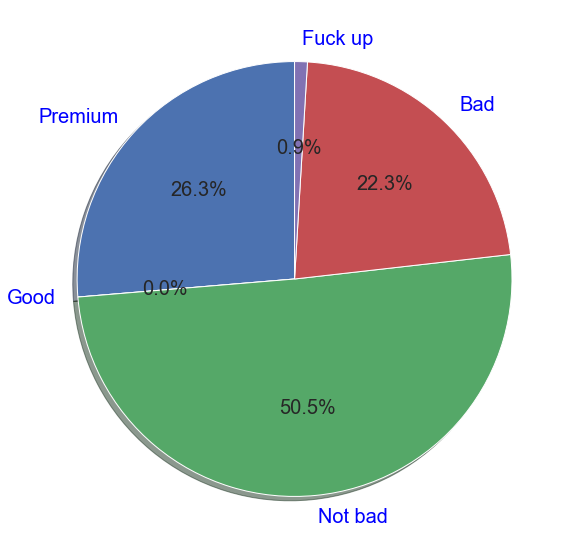

In [149]:
label = 'Premium', 'Good', 'Not bad', 'Bad', 'Fuck up' 
sizes = [cb[cb['Quality(round)'] == 5].shape[0],cb[cb['Quality(round)'] == 4].shape[0], 
         cb[cb['Quality(round)'] == 3].shape[0], cb[cb['Quality(round)'] == 2].shape[0], 
         cb[cb['Quality(round)'] == 1].shape[0]]
plt.figure(figsize=(10,10))
show = plt.pie(sizes, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.setp(show[2], size=20)
plt.setp(show[1], size=20, color='blue')
plt.axis()
plt.show()

Мы выяснили, что наибольшую долю составляет оценка "3"(от 3 до 4). Проведем анализ зависимости качества продукта от процентного содержания в нем какао-бобов(столбец "Cacao_percentage").

[Text(0, 0.5, 'Cocoa'), Text(0.5, 0, 'Quality')]

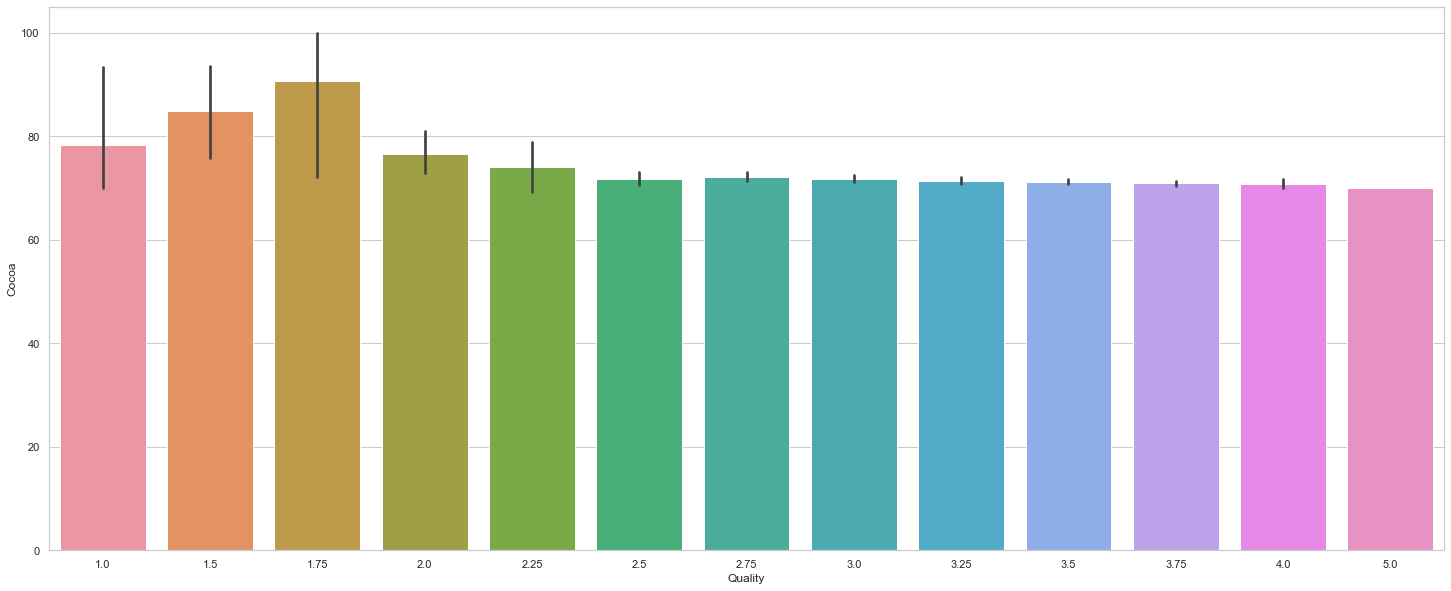

In [165]:
dy = sbn.barplot(x='Quality', y='Cocoa_percentage', data=cb)
axes = dy.axes
dy.set(xlabel='Quality', ylabel = "Cocoa")

В целом, качество шоколада не сильно зависит от процентоного содержания какао-бобов.

### Второй датасет

Второй датасет - датасет красного вина для определения его качества. 
База данных содержит следующие атрибуты: общая кислотность вина; уксусная кислота; лимонная кислота; сахар; соль; свободный диоксид серы; диоксид серы в целом; плотность; pH-уровень; сульфаты; процент алкоголя; качество вина.
Импортируем необходимые для работы библиотеки.

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

Считаем данные и выведем первые 5 строк.

In [167]:
rw = pd.read_csv('C:/Users/hui/Desktop/ML/input/red_wine.csv')
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Проверим, есть ли в датасете какие-либо пропуски.

In [169]:
rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

На этот раз пропущенных данных нет. 

Сделаем классификацию качества вина бинарной(хорошее или плохое вино). Для этого посмотрим сначала на максимальный и минимальный показатели качества, чтобы определить границы хорошего и плохого вина.

In [171]:
rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


min quality = 3
max quality = 8
В таком случае, вино будет считаться хорошим, если его качество > 6, иначе - плохим. 

In [173]:
rw['Binary_quality'] = pd.cut(rw['quality'], bins = [0, 6, 10], labels = ['bad', 'good'])
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Binary_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


А теперь посмотрим, от каких признаков наиболее зависит качество вина(имеет наибольшую корреляцию). 

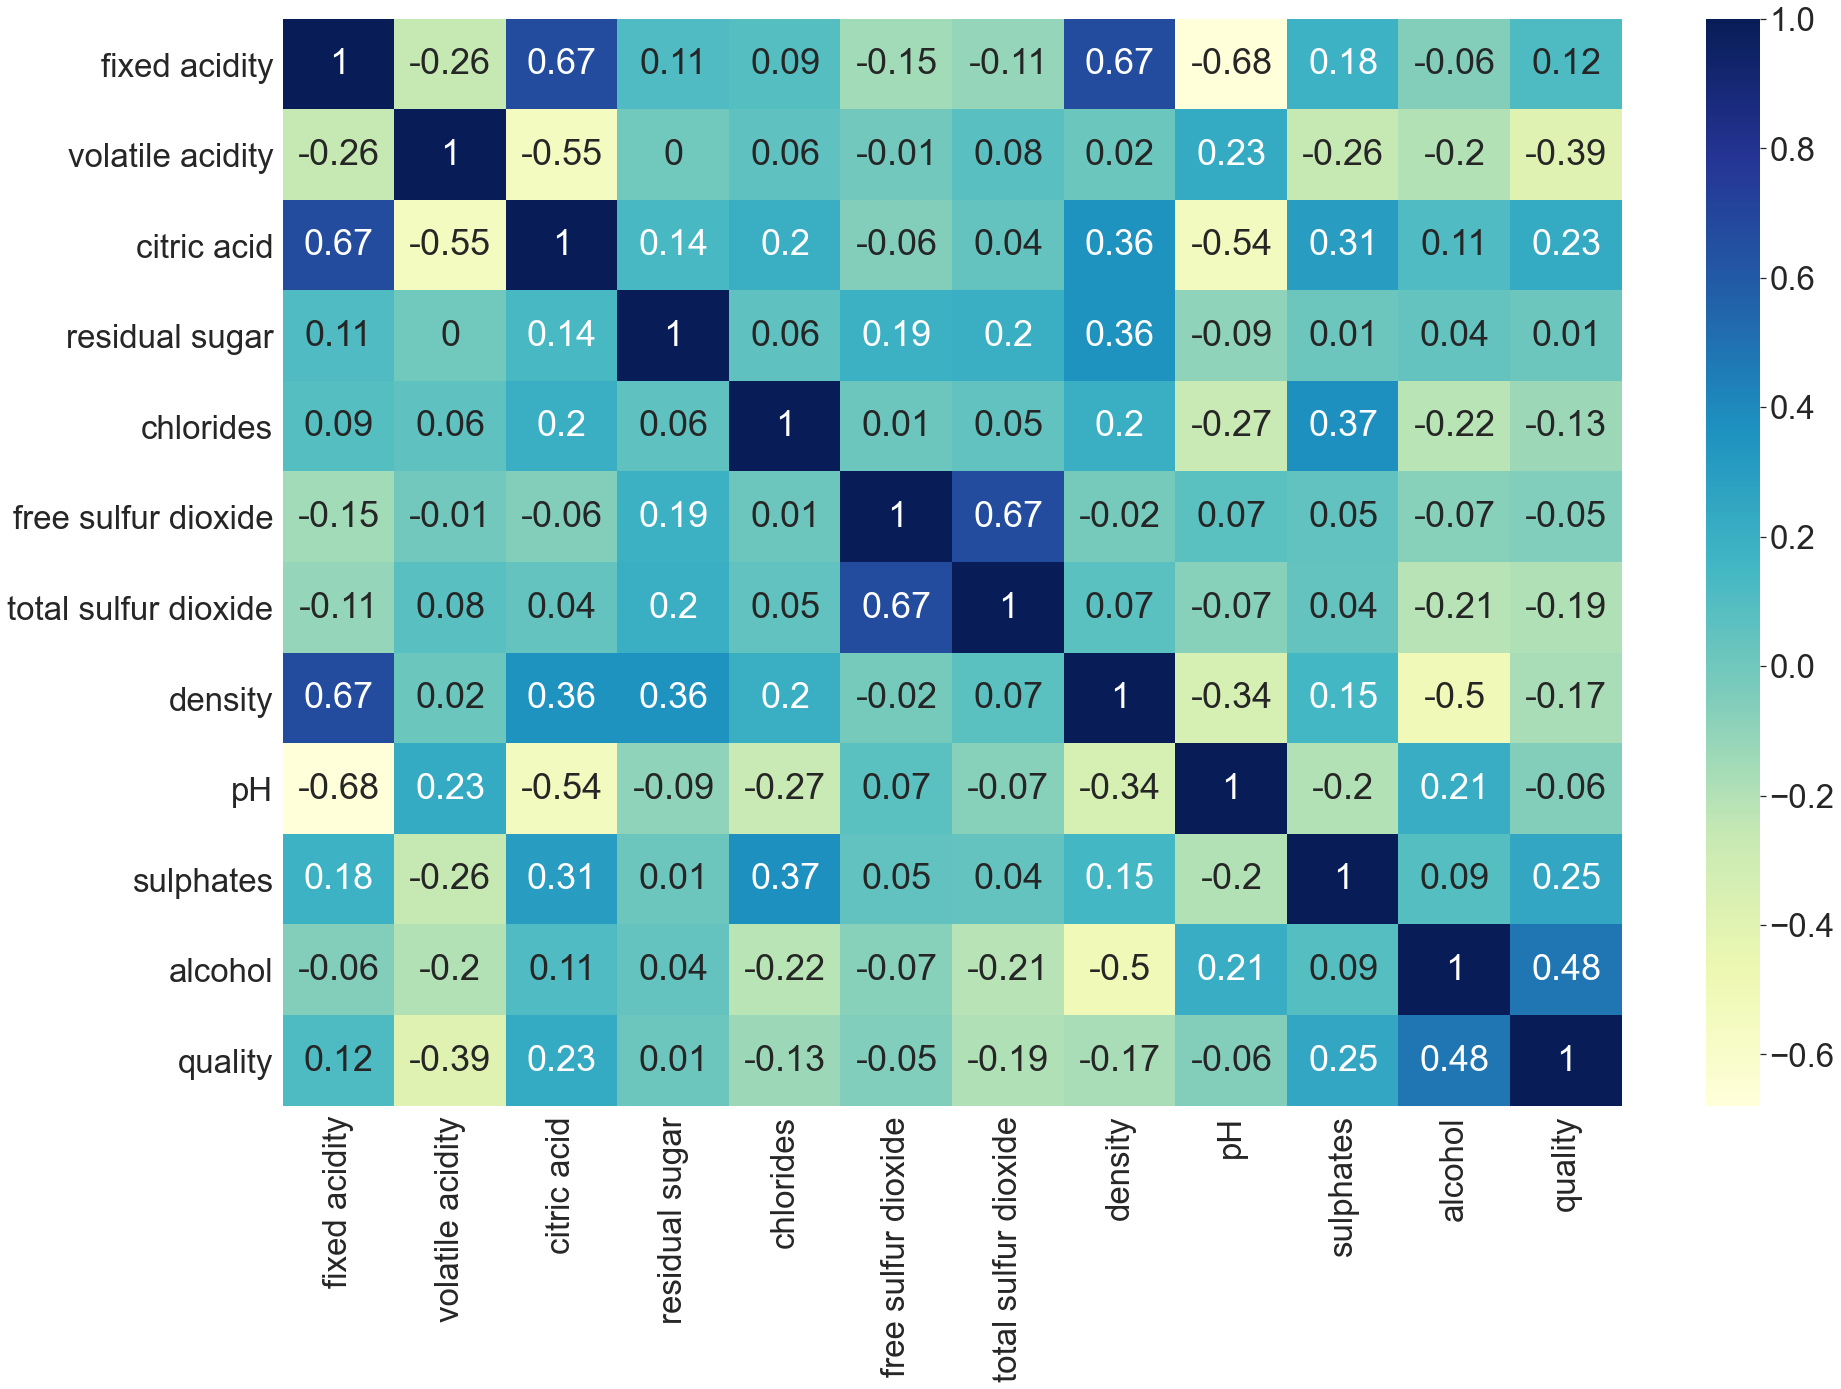

In [176]:
sbn.set(rc = {'figure.figsize':(30,20)}, style = 'whitegrid', font_scale = 3)
axes = sns.heatmap(rw.corr().round(2), cmap="YlGnBu", annot=True)

Наибольшая корреляция наблюдается с такими показателями, как количество лоимонной кислоты, количество сульфатов(которые помогают предотворащать рост микробов и окислений вина) и процент алкоголя - с этими показателями качество алкоголя имеет прямую зависимость.
Также не забудем про отрицательную корреляцию(обратная зависимость). Это показатель количества уксусной кислоты.
Построим графики зависимстей поочередно.

In [181]:
 def graphs(column, ylims):
    fig = plt.figure(figsize=(12, 10))
    gs = gridspec.GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    sbn.barplot('quality', rw.columns[column], data=rw, ax=ax1)
    sbn.barplot('Binary_quality', rw.columns[column], data=rw, ax=ax2)
    ax1.set_ylim(ylims[0], ylims[1])
    ax2.set_ylim(ylims[0], ylims[1])
    ax1.set_yticks(np.linspace(ylims[0], ylims[1], 11))
    ax2.set_yticks(np.linspace(ylims[0], ylims[1], 11))
    ax1.yaxis.grid()
    ax2.yaxis.grid()
    ax1.set_axisbelow(True)
    ax2.set_axisbelow(True)

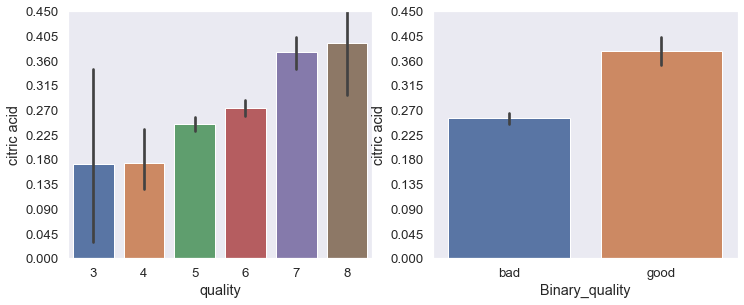

In [188]:
sbn.set(font_scale = 1.2)
graphs(2, [0, 0.45])

По данным графиков хорошо видно, лимонная кислота напрямую влияет на качество вина, и, чем ее больше, тем лучше вино.

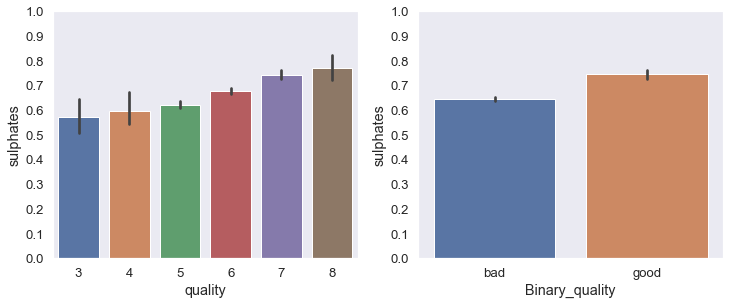

In [190]:
graphs(9, [0, 1])

Изучив графики, можно утверждать, что, действительно, при наибольшем количестве сульфатов качество вина возрастает.

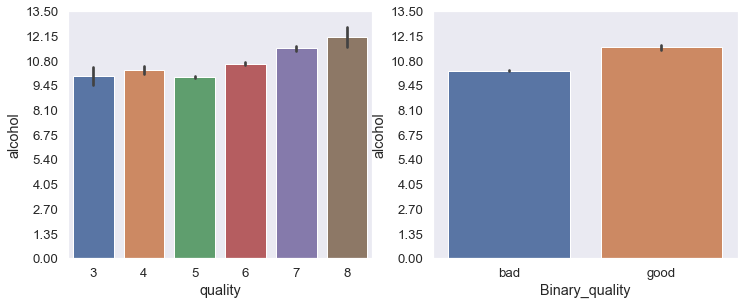

In [191]:
graphs(10, [0, 13.5])

Из графика видно, что у вина с худшим качеством наименьший процент алкоголя, и разница между худшим и лучшим вином по количеству алкоголя довольно весома, а зависимость линейна, исключая столбец 5.

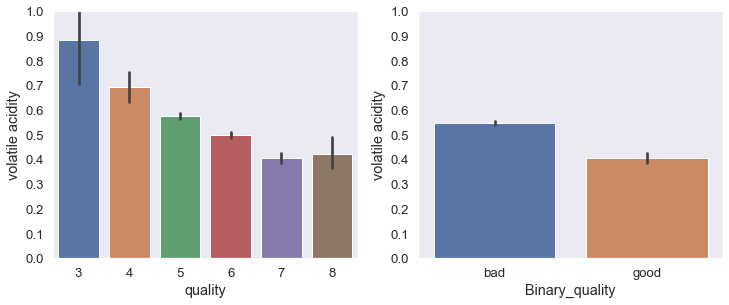

In [192]:
graphs(1, [0, 1])

По графикам видно, что при уменьшении количества уксусной кислоты будет возрастать качество. Следовательно, эта переменная действительно влияет на качество вина.

### Выводы

Честно говоря, я начинала делать данную лабораторную работу не один раз(и не два, а еще с конца мая). Но до этого раза я не понимала, насколько интересным может быть анализ различных датасетов. А сейчас поняла, это действительно увлекает.